## The Prophet Model

Libraries needed:<br>
1. Pandas: For data manipulation and preparation<br>
2. Matplotlib: For plotting and visualizing the data<br> 
3. fbprophet: The core library for time series forecasting<br>
4. Numpy<br>
6. Seaborn<br>
7. Statsmodel<br>  

 **To install FB Prophet install pystan first, uisng the pip command and then    python -m pip install prophet to     install the Prophet package.<br>   Be sure to update your anaconda environment and make sure all dependencies for Prophet are installed.<br>    Install Prophet not FB Prophet, as package has been renamed,from Fb Prophet to Prophet.**

In [1]:
# Importing relevant libraries for Prophet modeling

from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics


/Users/gorji1/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cyber_time_series = pd.read_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/final_time_series.csv')

# Convert 'Year' to datetime format for better handling
cyber_time_series['Year'] = pd.to_datetime(cyber_time_series['Year'])




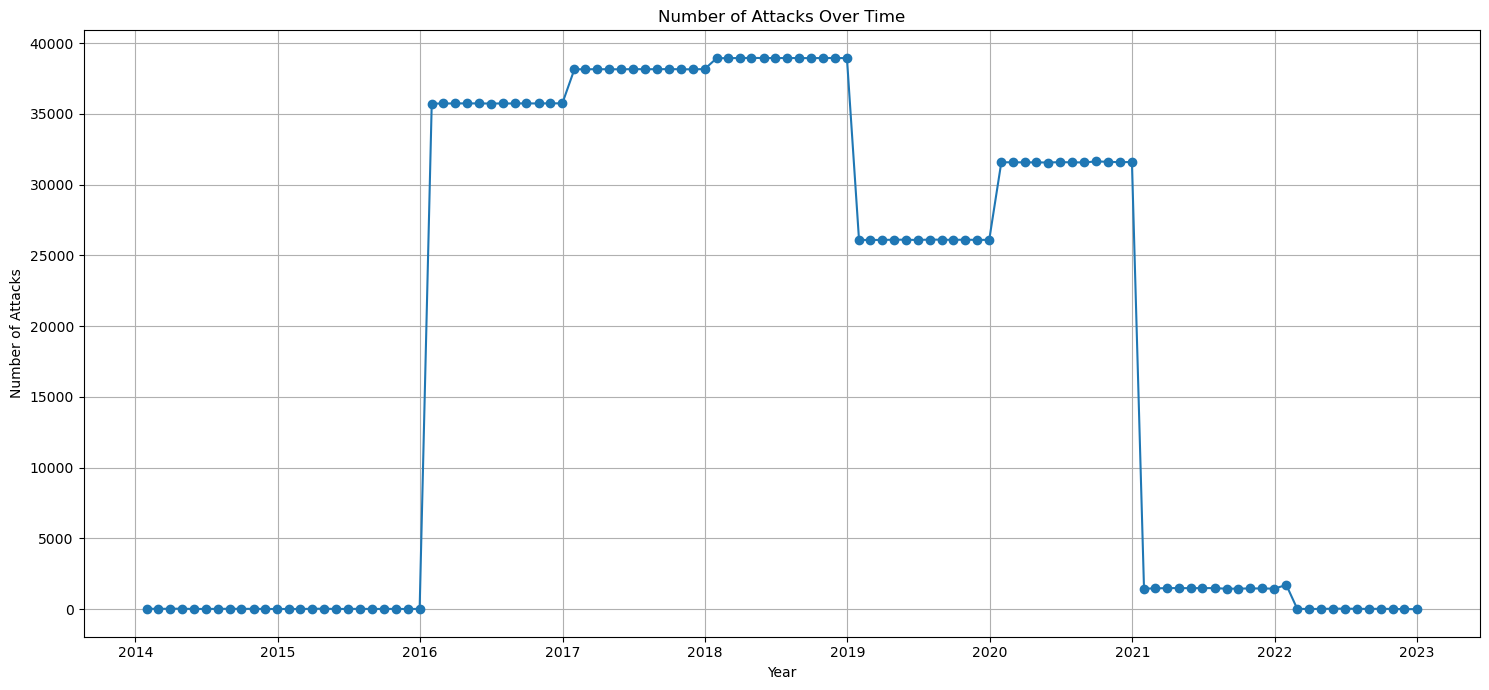

In [3]:

# Plotting the data with the correct column names
plt.figure(figsize=(15, 7))

# Plotting the 'Year' (timestamp) against the 'no_of_attacks' (values)
plt.plot(cyber_time_series['Year'], cyber_time_series['no_of_attacks'], marker='o', linestyle='-')
plt.title('Number of Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

<font size = '3.5'>
    
Upon visual inspection,  fluctuations in the number of attacks are seen. However, the amplitude of these fluctuations does not appear to increase significantly as the number of attacks increases or decreases. This pattern suggests that the data likely exhibits additive seasonality, where seasonal variations are roughly constant throughout the series.
</font>

In [4]:
# Split the data based on the specified years for training and testing

# Calculate the split point
split_point = int(len(cyber_time_series) * 0.8)  # 80% of the data size

# Split the data
train_prophet = cyber_time_series.iloc[:split_point]
test_prophet = cyber_time_series.iloc[split_point:]
train_prophet, test_prophet

(         Year  no_of_attacks
 0  2014-01-31           36.0
 1  2014-02-28           24.0
 2  2014-03-31           34.0
 3  2014-04-30           38.0
 4  2014-05-31           16.0
 ..        ...            ...
 81 2020-10-31        31617.0
 82 2020-11-30        31588.0
 83 2020-12-31        31604.0
 84 2021-01-31         1457.0
 85 2021-02-28         1470.0
 
 [86 rows x 2 columns],
           Year  no_of_attacks
 86  2021-03-31         1493.0
 87  2021-04-30         1492.0
 88  2021-05-31         1488.0
 89  2021-06-30         1493.0
 90  2021-07-31         1490.0
 91  2021-08-31         1449.0
 92  2021-09-30         1454.0
 93  2021-10-31         1471.0
 94  2021-11-30         1464.0
 95  2021-12-31         1456.0
 96  2022-01-31         1712.0
 97  2022-02-28           27.0
 98  2022-03-31           15.0
 99  2022-04-30           24.0
 100 2022-05-31           36.0
 101 2022-06-30           41.0
 102 2022-07-31           29.0
 103 2022-08-31           21.0
 104 2022-09-30          

## The prophet model was built using the default setting, i.e addictive, changepoints etc.

In [5]:
# Rename columns to fit the naming conventions expected by Prophet

train_prophet.rename(columns={'Year': 'ds', 'no_of_attacks': 'y'}, inplace=True)

test_prophet.rename(columns={'Year': 'ds', 'no_of_attacks': 'y'}, inplace=True)

# Display the first few rows of the renamed training and test sets to confirm
train_prophet.head(), test_prophet.head()


/var/folders/y3/5_ydnp0s5ddfxtfqygnzxwx00000gp/T/ipykernel_18281/796080418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_prophet.rename(columns={'Year': 'ds', 'no_of_attacks': 'y'}, inplace=True)
/var/folders/y3/5_ydnp0s5ddfxtfqygnzxwx00000gp/T/ipykernel_18281/796080418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_prophet.rename(columns={'Year': 'ds', 'no_of_attacks': 'y'}, inplace=True)


(          ds     y
 0 2014-01-31  36.0
 1 2014-02-28  24.0
 2 2014-03-31  34.0
 3 2014-04-30  38.0
 4 2014-05-31  16.0,
            ds       y
 86 2021-03-31  1493.0
 87 2021-04-30  1492.0
 88 2021-05-31  1488.0
 89 2021-06-30  1493.0
 90 2021-07-31  1490.0)

## Training the Prophet model

In [6]:
# Initialize the Prophet model

prophet_model = Prophet()

# Fit the model to the training data

prophet_model.fit(train_prophet)

# Display a message indicating that the model has been trained

"Prophet model has been trained."




21:46:48 - cmdstanpy - INFO - Chain [1] start processing
21:46:49 - cmdstanpy - INFO - Chain [1] done processing


'Prophet model has been trained.'

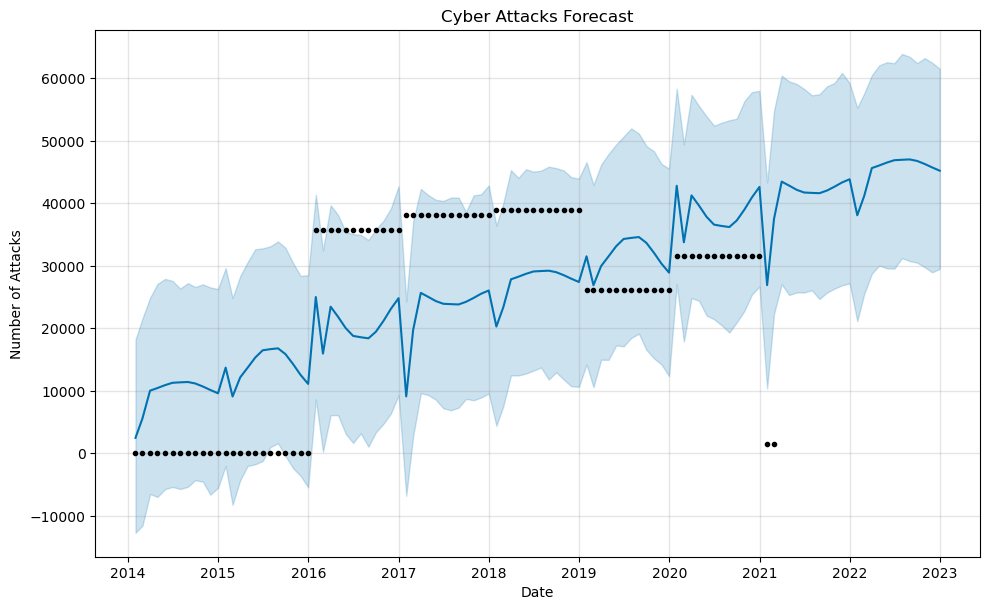

In [7]:
# Create future DataFrame
future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='M')

# Make predictions
forecast = prophet_model.predict(future)

import matplotlib.pyplot as plt

# Create the plot
fig = prophet_model.plot(forecast)

# Add title and labels
plt.title('Cyber Attacks Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Attacks')

# Show the plot
plt.show()



In [8]:
# Display the whole forecast DataFrame
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


            ds          yhat    yhat_lower    yhat_upper
103 2022-08-31  47039.137274  30772.811898  63468.334057
104 2022-09-30  46800.659464  30522.445345  62447.861032
105 2022-10-31  46313.030712  29790.874890  63250.740167
106 2022-11-30  45762.484826  28971.146898  62516.213390
107 2022-12-31  45230.653925  29533.273862  61555.419975


<font size = '3.5'>
In the output of Prophet's forecast,  a column named 'yhat' alongside 'yhat_lower' and 'yhat_upper' can be seen, which represent the predicted value and the uncertainty intervals, respectively. The 'yhat' is the main output of the forecast, indicating what the model predicts will happen at each point in the future. Itis calculated based on the underlying components of the model, including trends, seasonality, and holiday effects, among others.
</font>

### Plotting the components of the forecast.

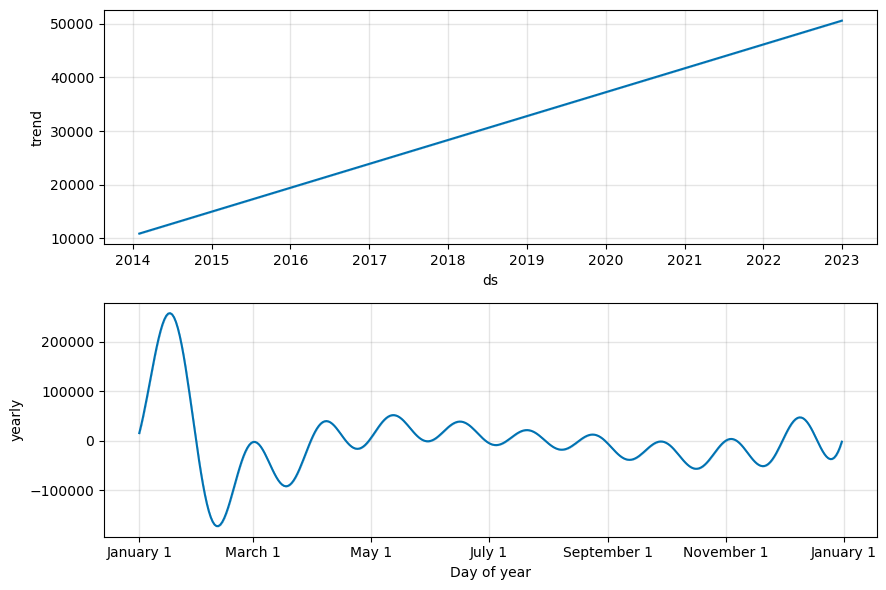

In [9]:
fig2 = prophet_model.plot_components(forecast)


<font size = '3.5'>
 The Trend Graph shows a steadily increasing linear trend over time.The Yearly Graph displays regular, repeating patterns (or seasons) over the course of each year. The amplitude or magnitude of these fluctuations seems to remain consistent over time. The peaks and troughs appear to have a roughly constant distance from the trend, even as the trend increases.

The combination of a consistent amplitude in seasonal fluctuations combined with a steady trend is characteristic of additive seasonality. If the magnitude of the seasonal fluctuations had been increasing or decreasing in proportion to the trend, it would have indicated multiplicative seasonality.
</font>

In [10]:
# Generate future dates for 3 years (36 months)

# Specify the last date of your training data and the end date for the forecast

last_date_train = train_prophet['ds'].max()
end_date_forecast = '2025-12-31'

# Create the future dataframe
future_dates_3yr = prophet_model.make_future_dataframe(periods=(pd.to_datetime(end_date_forecast) - last_date_train).days)

# Generate 3-year forecast
forecast_3yr = prophet_model.predict(future_dates_3yr)


Text(0.5, 1.0, '3-Year Forecast')

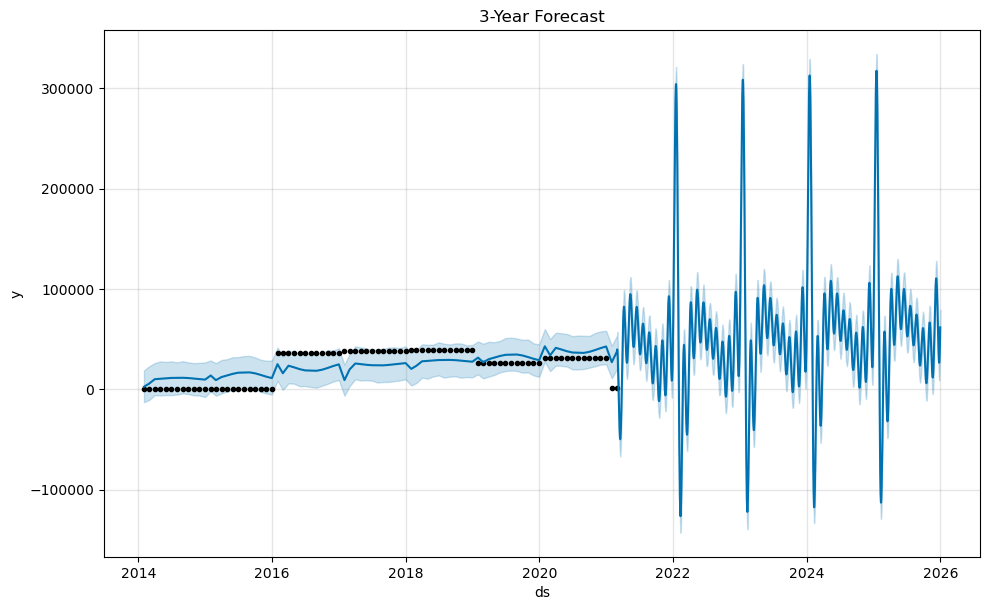

In [11]:


# Plot the 3-year forecast

fig1_3yr = prophet_model.plot(forecast_3yr)
plt.title('3-Year Forecast')





In [12]:
# Specify the last date of your training data and the end date for the 5-year forecast
last_date_train = train_prophet['ds'].max()
end_date_forecast_5yr = '2027-12-31'

# Create the future dataframe for 5 years
future_dates_5yr = prophet_model.make_future_dataframe(periods=(pd.to_datetime(end_date_forecast_5yr) - last_date_train).days)

# Generate the 5-year forecast
forecast_5yr = prophet_model.predict(future_dates_5yr)




Text(0.5, 1.0, '5-Year Forecast')

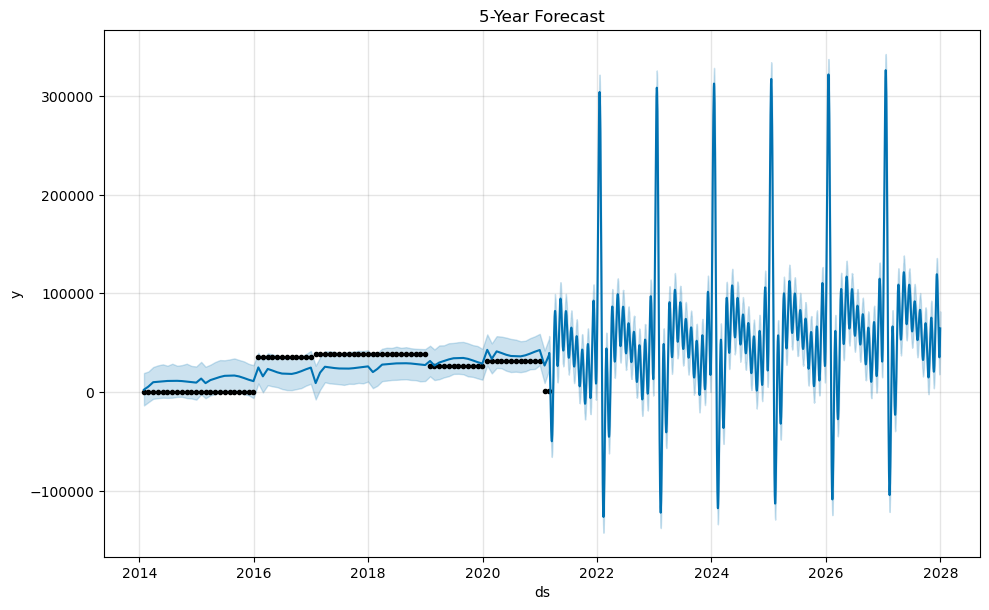

In [13]:
# Plot the 5-year forecast

fig1_5yr = prophet_model.plot(forecast_5yr)
plt.title('5-Year Forecast')

<font size = '4.5'>
    
3 and 5- year forecasts were made using the trained model, it seems from the plots that the model captured the seasonal trend of the data and tend to perform better in short term forecasts as seen in the performance metric measures.
</font>

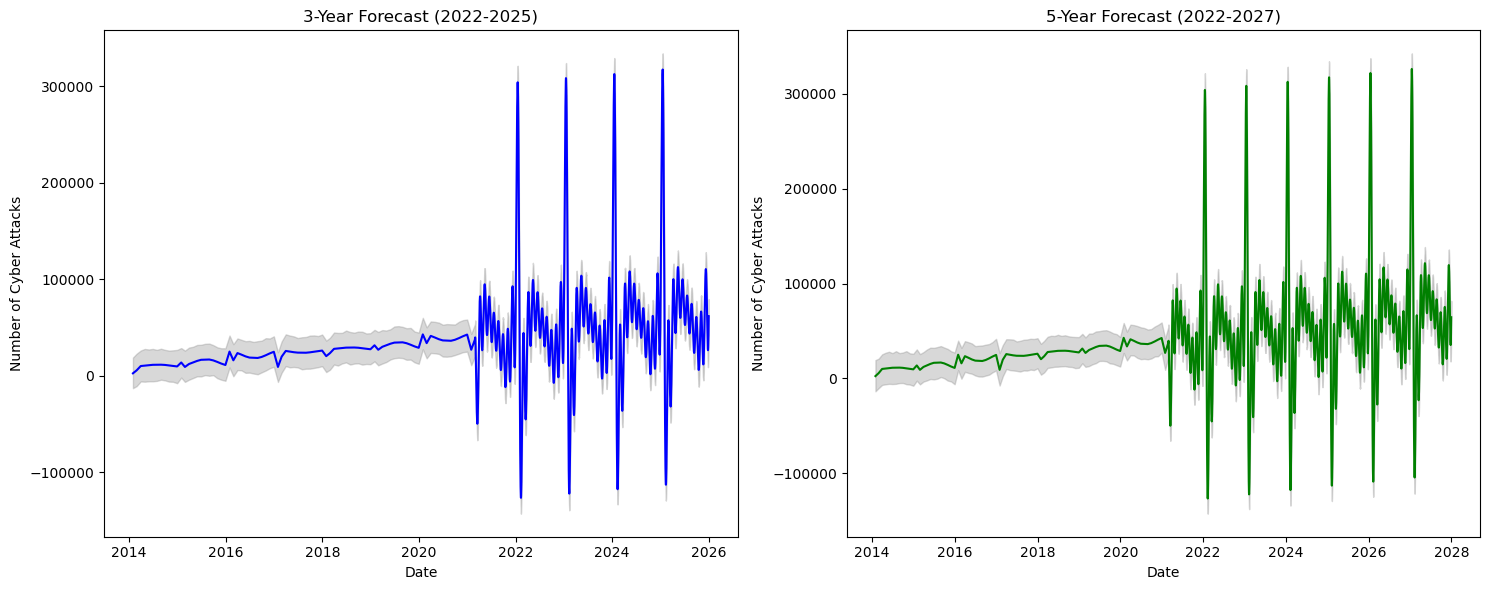

In [14]:
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the 3-year forecast
axes[0].plot(forecast_3yr['ds'], forecast_3yr['yhat'], label='3-Year Forecast', color='blue')
axes[0].fill_between(forecast_3yr['ds'], forecast_3yr['yhat_lower'], forecast_3yr['yhat_upper'], color='gray', alpha=0.3)
axes[0].set_title('3-Year Forecast (2022-2025)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Cyber Attacks')

# Plot the 5-year forecast
axes[1].plot(forecast_5yr['ds'], forecast_5yr['yhat'], label='5-Year Forecast', color='green')
axes[1].fill_between(forecast_5yr['ds'], forecast_5yr['yhat_lower'], forecast_5yr['yhat_upper'], color='gray', alpha=0.3)
axes[1].set_title('5-Year Forecast (2022-2027)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Cyber Attacks')

# Adjust layout
plt.tight_layout()
plt.show()


<font size = '4.0'>
    
**3 -Year Forecast (2022-2025) in Blue**:

Historical Data: The shaded gray region depicts the historical data up to 2022. The trend appears to have remained relatively stable with some fluctuations over the years.

Forecasted Data: The blue line and region represent the forecasted values and their confidence interval, respectively. We see significant seasonal peaks that are occurring with higher intensity and regularity.

Trend: It seems there's a slight upward trend starting from 2022 to 2025, implying that the overall number of cyber attacks may be increasing over these three years.

Seasonality: The pronounced regular peaks might indicate strong seasonality in the data, possibly due to specific times in the year when cyber attacks are more prevalent.

**5-Year Forecast (2022-2027) in Green**:

Historical Data: Like in the first graph, the shaded gray region indicates the historical data up to 2022. This data appears steady with fluctuations.

Forecasted Data: The green line and region display the forecasted values and their associated confidence interval. Just like the 3-year forecast, we see regular seasonal peaks.

Trend: The trend seems to remain relatively stable over the five years, but slightly higher than the historical average. This suggests a modest rise in cyber attacks from 2022 onward.

Seasonality: Similar to the 3-year forecast, this graph also showcases strong seasonality with regular peaks, implying certain periods within the year may be more susceptible to cyber attacks.
</font>

## Performance Metrics calculation

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Extract the last N forecasted values
best_forecast = forecast['yhat'].tail(len(test_prophet)).values

# Calculate RMSE
rmse_best_model = np.sqrt(mean_squared_error(test_prophet['y'], best_forecast))

# Calculate MSE
mse_best_model = mean_squared_error(test_prophet['y'], best_forecast)

# Calculate MAE
mae_best_model = mean_absolute_error(test_prophet['y'], best_forecast)

# Calculate the mean absolute error of the naive forecast (one-step-ahead forecast from the training dataset)
naive_forecast_errors = np.abs(train_prophet['y'].iloc[1:].values - train_prophet['y'].iloc[:-1].values)
mean_absolute_error_naive = np.mean(naive_forecast_errors)

# Now, calculate MASE using the MAE of the model's forecasts and the MAE of the naive forecast
mase_value = mae_best_model / mean_absolute_error_naive

# Compile the metrics into a DataFrame
performance_metrics_prophet = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'MASE'],
    'Best Model (Prophet)': [rmse_best_model, mse_best_model, mae_best_model, mase_value]
})

# Set the float format for pandas display options
pd.options.display.float_format = '{:.2f}'.format

# Display the performance metrics
print(performance_metrics_prophet)



  Metric  Best Model (Prophet)
0   RMSE              43352.42
1    MSE         1879432053.06
2    MAE              43246.59
3   MASE                 41.73


## Cross validation of the Prophet model (1 year)

In [16]:
# Perform cross-validation

# Perform cross-validation
prophet_cv = cross_validation(prophet_model, 
                         initial='1460 days',  # Approximately 4 years as the initial training period
                         period='180 days',    # Approximately every 6 months
                         horizon='365 days')   # Approximately 12 months


# Calculate performance metrics
df_p = performance_metrics(prophet_cv)

# Display the performance metrics
df_p.tail()

  0%|                                                     | 0/5 [00:00<?, ?it/s]21:46:50 - cmdstanpy - INFO - Chain [1] start processing
21:46:50 - cmdstanpy - INFO - Chain [1] done processing
 20%|█████████                                    | 1/5 [00:00<00:00,  5.99it/s]21:46:50 - cmdstanpy - INFO - Chain [1] start processing
21:46:51 - cmdstanpy - INFO - Chain [1] done processing
 40%|██████████████████                           | 2/5 [00:00<00:00,  5.58it/s]21:46:51 - cmdstanpy - INFO - Chain [1] start processing
21:46:51 - cmdstanpy - INFO - Chain [1] done processing
 60%|███████████████████████████                  | 3/5 [00:00<00:00,  5.17it/s]21:46:51 - cmdstanpy - INFO - Chain [1] start processing
21:46:51 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  5.31it/s]21:46:51 - cmdstanpy - INFO - Chain [1] start processing
21:46:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████████████████████████

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
50,354 days,1303430840.47,36103.06,35307.13,5.89,1.31,0.93,0.00
51,358 days,1193700136.46,34549.97,33868.13,5.84,1.30,0.91,0.00
52,360 days,1227943229.22,35042.02,34352.52,5.82,1.25,0.90,0.00
53,364 days,1063018576.62,32603.97,31594.48,5.73,1.23,0.86,0.00
54,365 days,1395394612.21,37354.98,36387.02,11.18,1.31,1.10,0.00


In [17]:
# extract the mae value from the table displayed after running the cross-validation code.

mae = 36387.02
# Calculate the mean absolute error of the naive forecast (one-step-ahead forecast from the training dataset)
naive_forecast_errors = np.abs(train_prophet['y'].iloc[1:].values - train_prophet['y'].iloc[:-1].values)
mean_absolute_error_naive = np.mean(naive_forecast_errors)

# Now, calculate MASE using the MAE of the model's forecasts and the MAE of the naive forecast
mase= mae / mean_absolute_error_naive
# Check the result
print(mase)

35.11303641978112


In [18]:
# Create a DataFrame to represent the Prophet performance metrics for 365 days
prophet_365_metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MASE'],
    'Prophet (365 days)': [1395394612.21,37354.98, 36387.02, mase]  
})

prophet_365_metrics_df


,Metric,Prophet (365 days)
0,MSE,1395394612.21
1,RMSE,37354.98
2,MAE,36387.02
3,MASE,35.11


In [19]:
# save the cross-validation values for comparison

#save_path = ('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Results/prophet_365_metrics_df.csv')
#prophet_365_metrics_df.to_csv(save_path, index=False)
#save_path

'/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Results/prophet_365_metrics_df.csv'

## Cross validation of the Prophet model (3 years)

In [20]:
# Perform cross-validation

# Perform cross-validation

prophet_cv3 = cross_validation(prophet_model, 
                         initial='731 days',  # Approximately 2 years as the initial training period
                         period='180 days',    # Approximately every 6 months
                         horizon='1096 days')   # Approximately 36 months(3years)


# Calculate performance metrics
df_p2 = performance_metrics(prophet_cv3)

# Display the performance metrics
df_p2.tail()

  0%|                                                     | 0/5 [00:00<?, ?it/s]21:46:51 - cmdstanpy - INFO - Chain [1] start processing
21:46:51 - cmdstanpy - INFO - Chain [1] done processing
21:46:51 - cmdstanpy - INFO - Chain [1] start processing
21:46:51 - cmdstanpy - INFO - Chain [1] done processing
 40%|██████████████████                           | 2/5 [00:00<00:00, 12.74it/s]21:46:51 - cmdstanpy - INFO - Chain [1] start processing
21:46:52 - cmdstanpy - INFO - Chain [1] done processing
21:46:52 - cmdstanpy - INFO - Chain [1] start processing
21:46:52 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  8.38it/s]21:46:52 - cmdstanpy - INFO - Chain [1] start processing
21:46:52 - cmdstanpy - INFO - Chain [1] done processing
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  8.11it/s]


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
158,1085 days,2473263996.72,49731.92,46803.89,4.50,1.67,1.01,0.00
159,1089 days,2375867355.22,48742.87,45786.60,4.49,1.64,1.01,0.00
160,1091 days,2456800877.92,49566.13,46495.18,4.51,1.67,1.02,0.00
161,1095 days,2570254713.94,50697.68,47830.17,4.56,1.71,1.00,0.00
162,1096 days,2945409990.75,54271.63,50609.95,7.97,1.73,1.05,0.00


In [21]:
# do same for the five year cross validation.

# extract the mae value from the table displayed after running the cross-validation code.

mae_cv3 = 50609.95

# Calculate the mean absolute error of the naive forecast (one-step-ahead forecast from the training dataset)

naive_forecast_errors = np.abs(train_prophet['y'].iloc[1:].values - train_prophet['y'].iloc[:-1].values)

mean_absolute_error_naive = np.mean(naive_forecast_errors)

# Now, calculate MASE using the MAE of the model's forecasts and the MAE of the naive forecast
mase_cv3= mae_cv3 / mean_absolute_error_naive
# Check the result
print(mase_cv3)

48.83799271150266


In [22]:
# Create a DataFrame to represent the Prophet performance metrics for 365 days
prophet_1096_metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MASE'],
    'Prophet (1096 days)': [2945409990.75, 54271.63, 50609.95, mase_cv3]  # MAPE is converted to percentage
})

prophet_1096_metrics_df

,Metric,Prophet (1096 days)
0,MSE,2945409990.75
1,RMSE,54271.63
2,MAE,50609.95
3,MASE,48.84


In [23]:
# save the cross-validation values for comparison

#save_path_2 = ('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Results/prophet_1096_metrics_df.csv')
#prophet_1096_metrics_df.to_csv(save_path_2, index=False)
#save_path_2

'/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Results/prophet_1096_metrics_df.csv'

### This script is part of the author's research project,  2nd stage: Model development.


    
### This script can be reproduced without permission.
    


### Author : Chinyere.O.Ugorji &copy; 2023


In [24]:
import sys
print(sys.version)


3.10.12 (main, Jul  5 2023, 14:49:34) [Clang 14.0.6 ]
